**BUSINESS UNDERSTANDING**

**TITLE: SEPSIS**

**Introduction**

Sepsis is a life-threatening medical condition caused by the body's extreme response to an infection. Early detection and intervention are critical to improving patient outcomes and reducing mortality rates. However, diagnosing sepsis is often challenging due to its complex and multifactorial nature, which involves a combination of clinical, physiological, and laboratory features.

This project aims to leverage machine learning techniques to build a predictive model capable of identifying patients at risk of sepsis. By analyzing patient data, this model can assist healthcare professionals in making informed decisions, facilitating early diagnosis, and potentially saving lives.



**Business Understanding**

**Objective**

The primary goal of this project is to predict the likelihood of a patient developing sepsis based on clinical and demographic data. The insights from this analysis can help:

1. Improve early detection of sepsis in hospitals or clinics.
2. Optimize resource allocation for high-risk patients.
3. Reduce sepsis-related mortality rates by facilitating timely intervention.

**Business Questions**

  
1. What patient characteristics (e.g., age, PR, SK, M11) are most predictive of developing sepsis?
2. How do insurance status and age affect the likelihood of sepsis in patients?
3. Is there a difference in the PR, PL, and BD2 features for patients with positive vs. negative sepsis outcomes?
4. Can a machine learning model accurately predict whether a patient will develop sepsis based on their clinical features?
5. How does the combination of PR, TS, and M11 impact sepsis risk for patients of different ages?

**Hypotheses**

Null Hypothesis (H₀): A patient’s age has no significant impact on the development of sepsis.


Alternative Hypothesis (H₁): Older patients are more likely to develop sepsis than younger patients.

**Data Exploration Plan**

1. Understanding the Dataset
Begin by loading and understanding the dataset. Check for the following;

- Structure: What are the rows and columns? Are there any missing values?
- Data Types: Are the columns numerical, categorical, or mixed?
- Basic Descriptive Statistics: Mean, median, standard deviation, etc., for numerical variables.


2. Data Cleaning
- Handle Missing Values: Determine whether missing values can be imputed or need to be dropped.
- Check for Duplicates: Identify and remove duplicate rows.

3. Exploratory Data Analysis (EDA)
- Focus on analyzing the data to validate hypotheses and answer business questions.


**Importing necessary libraries**

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler,QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind

# Check for multicollinearity using variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Modelling
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score,roc_auc_score)
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')

In [2]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("chaunguynnghunh/sepsis")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\ADMIN\.cache\kagglehub\datasets\chaunguynnghunh\sepsis\versions\2


In [3]:
# loading data

data = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\API_projects\Paitients_Files_Train.csv")
data

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [4]:
data_test =pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\API_projects\Paitients_Files_Test.csv")
data_test

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...,...
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [6]:
data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# data cleaning

# Check for missing values
data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [8]:
# checking for duplicates

data.duplicated().sum()

0

In [9]:
# data shape

data.shape

(599, 11)

In [10]:
data_test.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [11]:
data_test.duplicated().sum()

0

In [12]:
data_test.shape

(169, 10)

In [13]:
# columns in the data
#ID: number to represent patient ID
#PRG: Plasma glucose
#PL: Blood Work Result-1 (mu U/ml)
#PR: Blood Pressure (mm Hg)
#SK: Blood Work Result-2 (mm)
#TS: Blood Work Result-3 (mu U/ml)
#M11: Body mass index (weight in kg/(height in m)^2
#BD2: Blood Work Result-4 (mu U/ml)
#Age: patients age (years)
#Insurance: If a patient holds a valid insurance card
#Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

In [14]:
#drop 'ID'
data.drop('ID', axis=1, inplace=True)

In [15]:
data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,0,188,82,14,185,32.0,0.682,22,1,Positive
596,0,67,76,0,0,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [16]:
# separate feature and target variable

X= data.drop(columns =['Sepssis']) # drop target column
y=data['Sepssis'] #Target column

**Exploratory Data Analysis (EDA)**

**Univariate Analysis:**

In [17]:
#Analyze individual columns to understand their distribution:

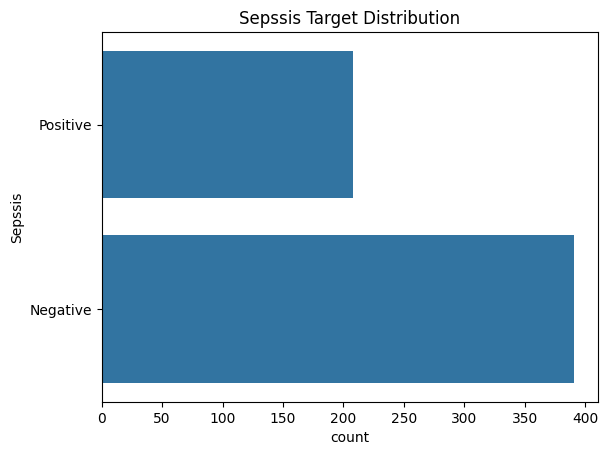

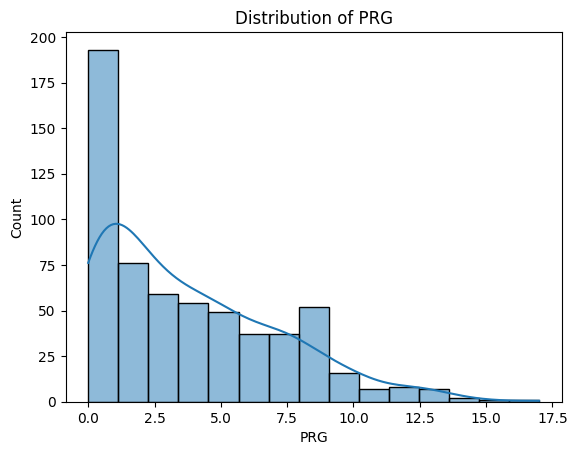

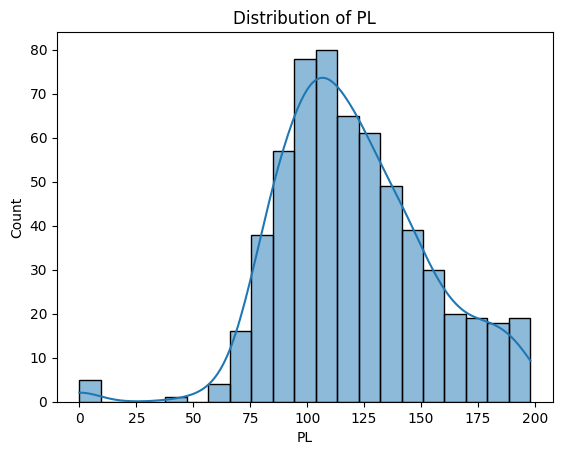

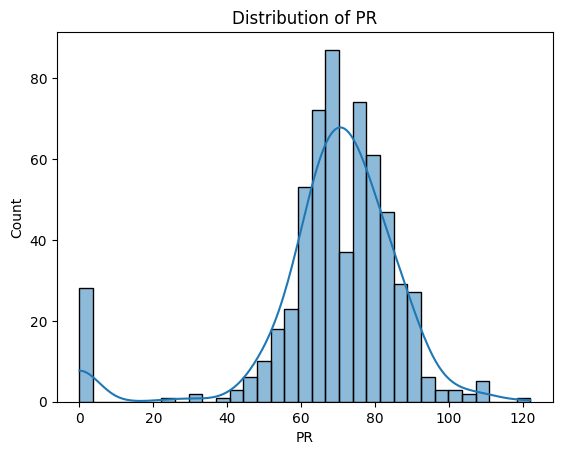

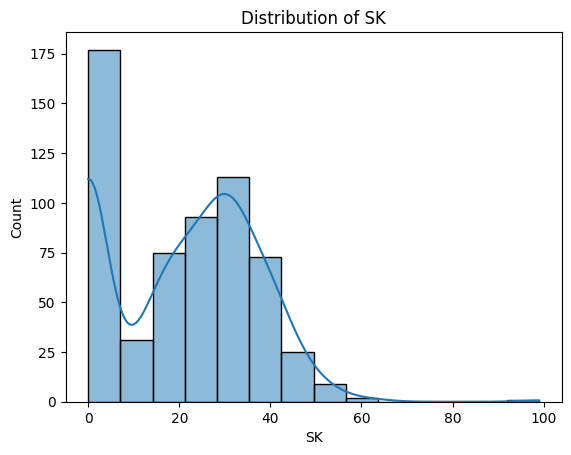

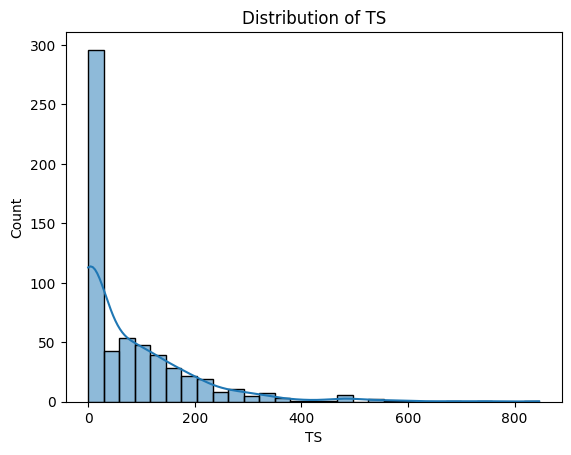

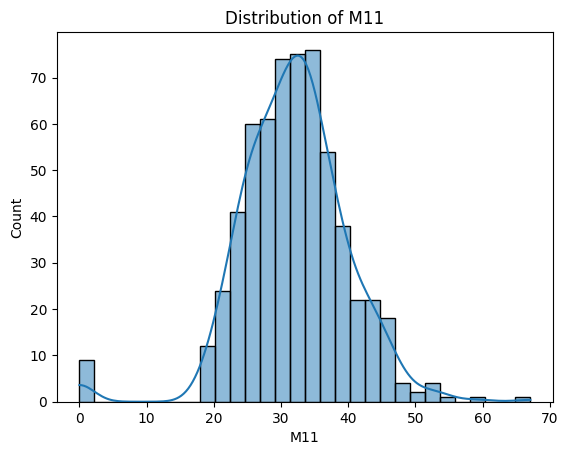

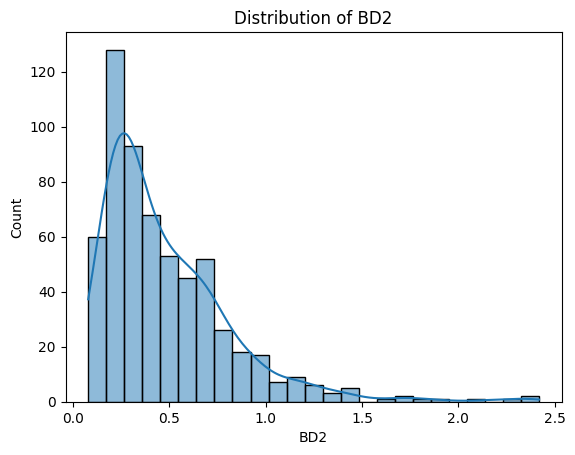

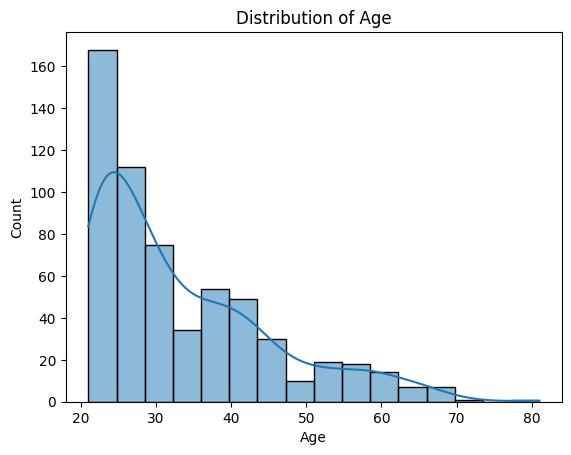

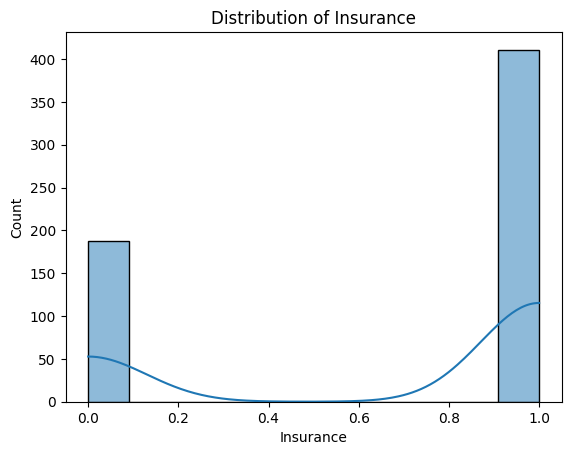

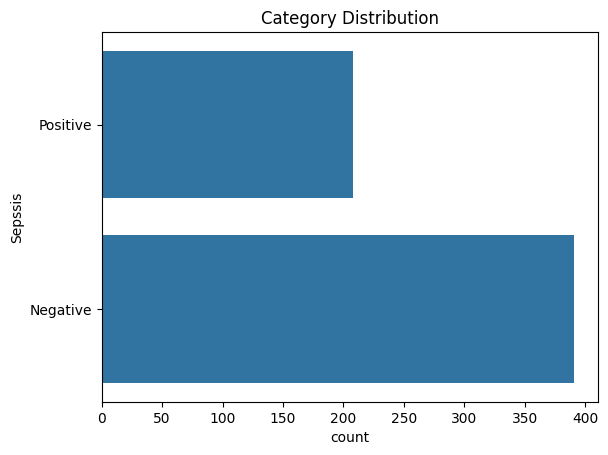

In [18]:
# Target variable (sepsis presence)
sns.countplot(data['Sepssis']) 
plt.title('Sepssis Target Distribution')
plt.show()

# Numerical feature distributions
numerical_columns = ['PRG', 'PL','PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']  
for col in numerical_columns:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical feature counts
sns.countplot(data['Sepssis']) 
plt.title('Category Distribution')
plt.show()


**Bivariate Analysis:**

In [19]:
# Study the relationship between the target variable and other features:

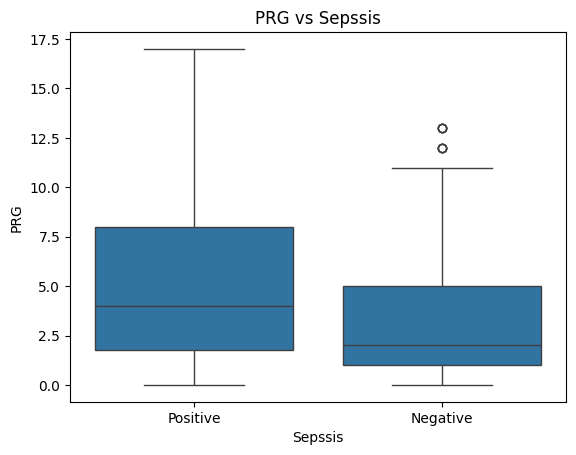

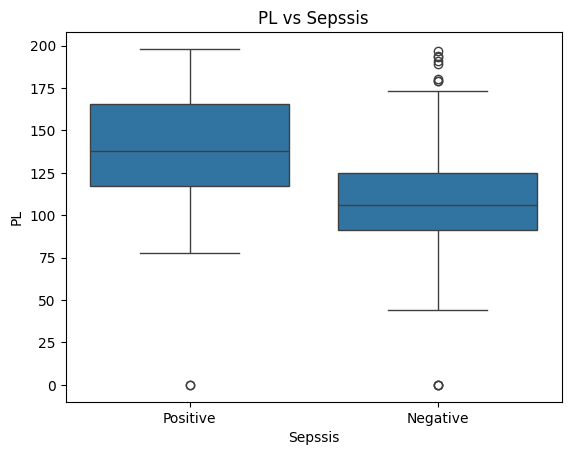

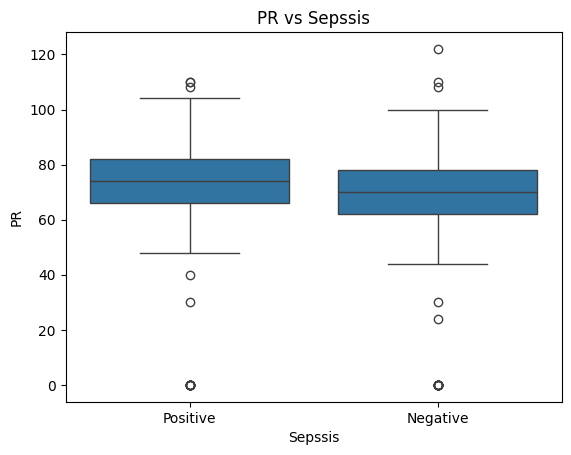

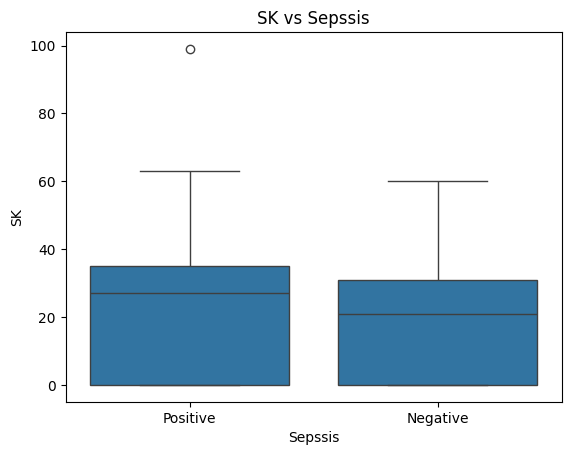

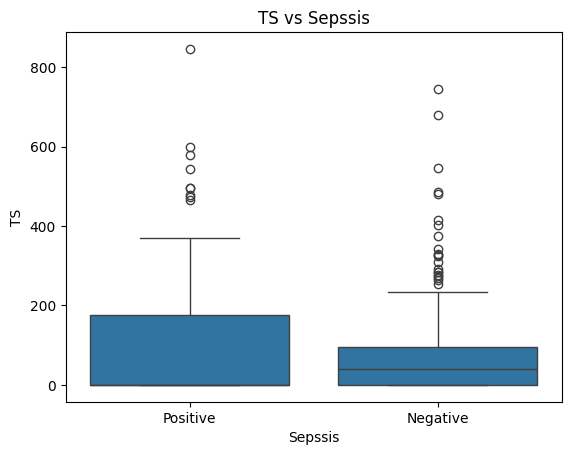

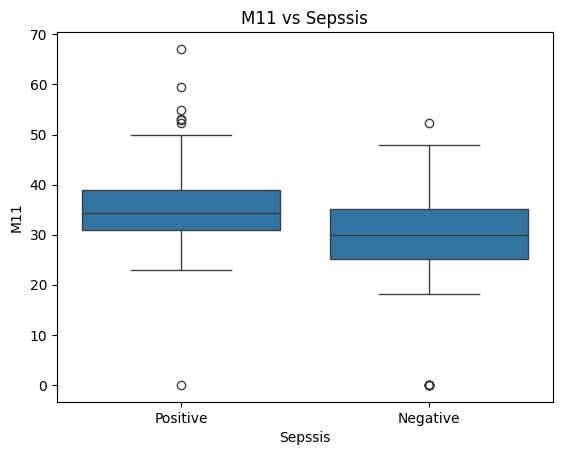

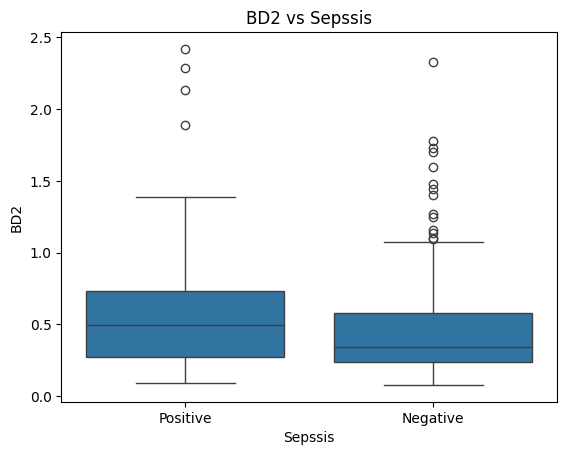

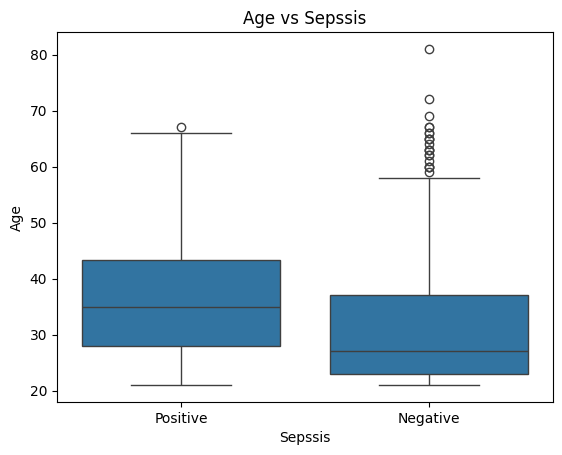

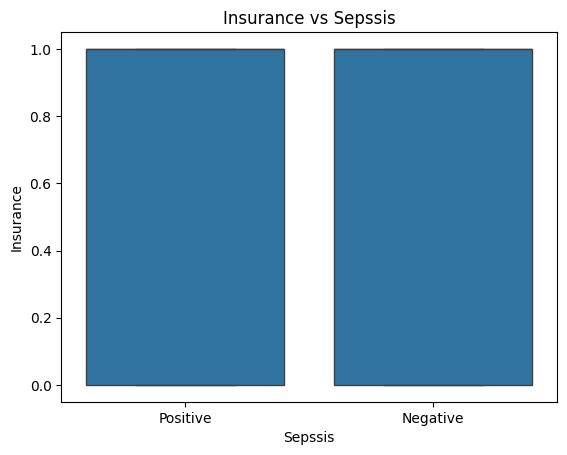

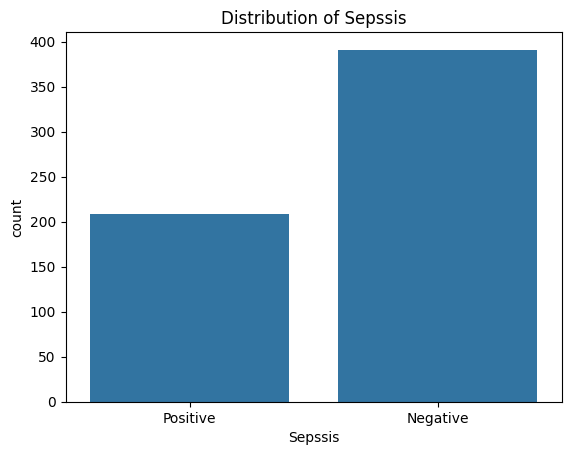

In [20]:
# Boxplot for numerical features vs target

numerical_columns =data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    if col in data.columns:
        sns.boxplot(x='Sepssis', y=col, data=data)
        plt.title(f'{col} vs Sepssis')
        plt.show()
    
categorical_columns = ['Sepssis']  

# Bar plot for the categorical column 'Sepssis' vs numerical features
sns.countplot(x='Sepssis', data=data)
plt.title('Distribution of Sepssis')
plt.show()




**Correlation Analysis:**

In [21]:
#Identify relationships between numerical features:

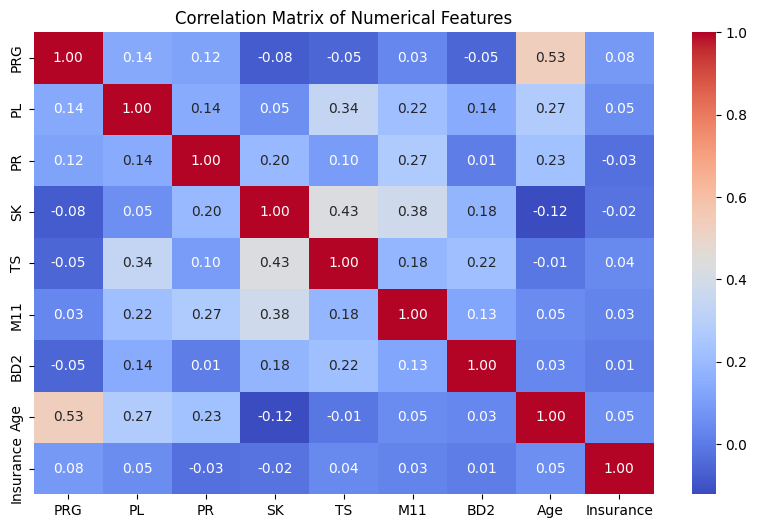

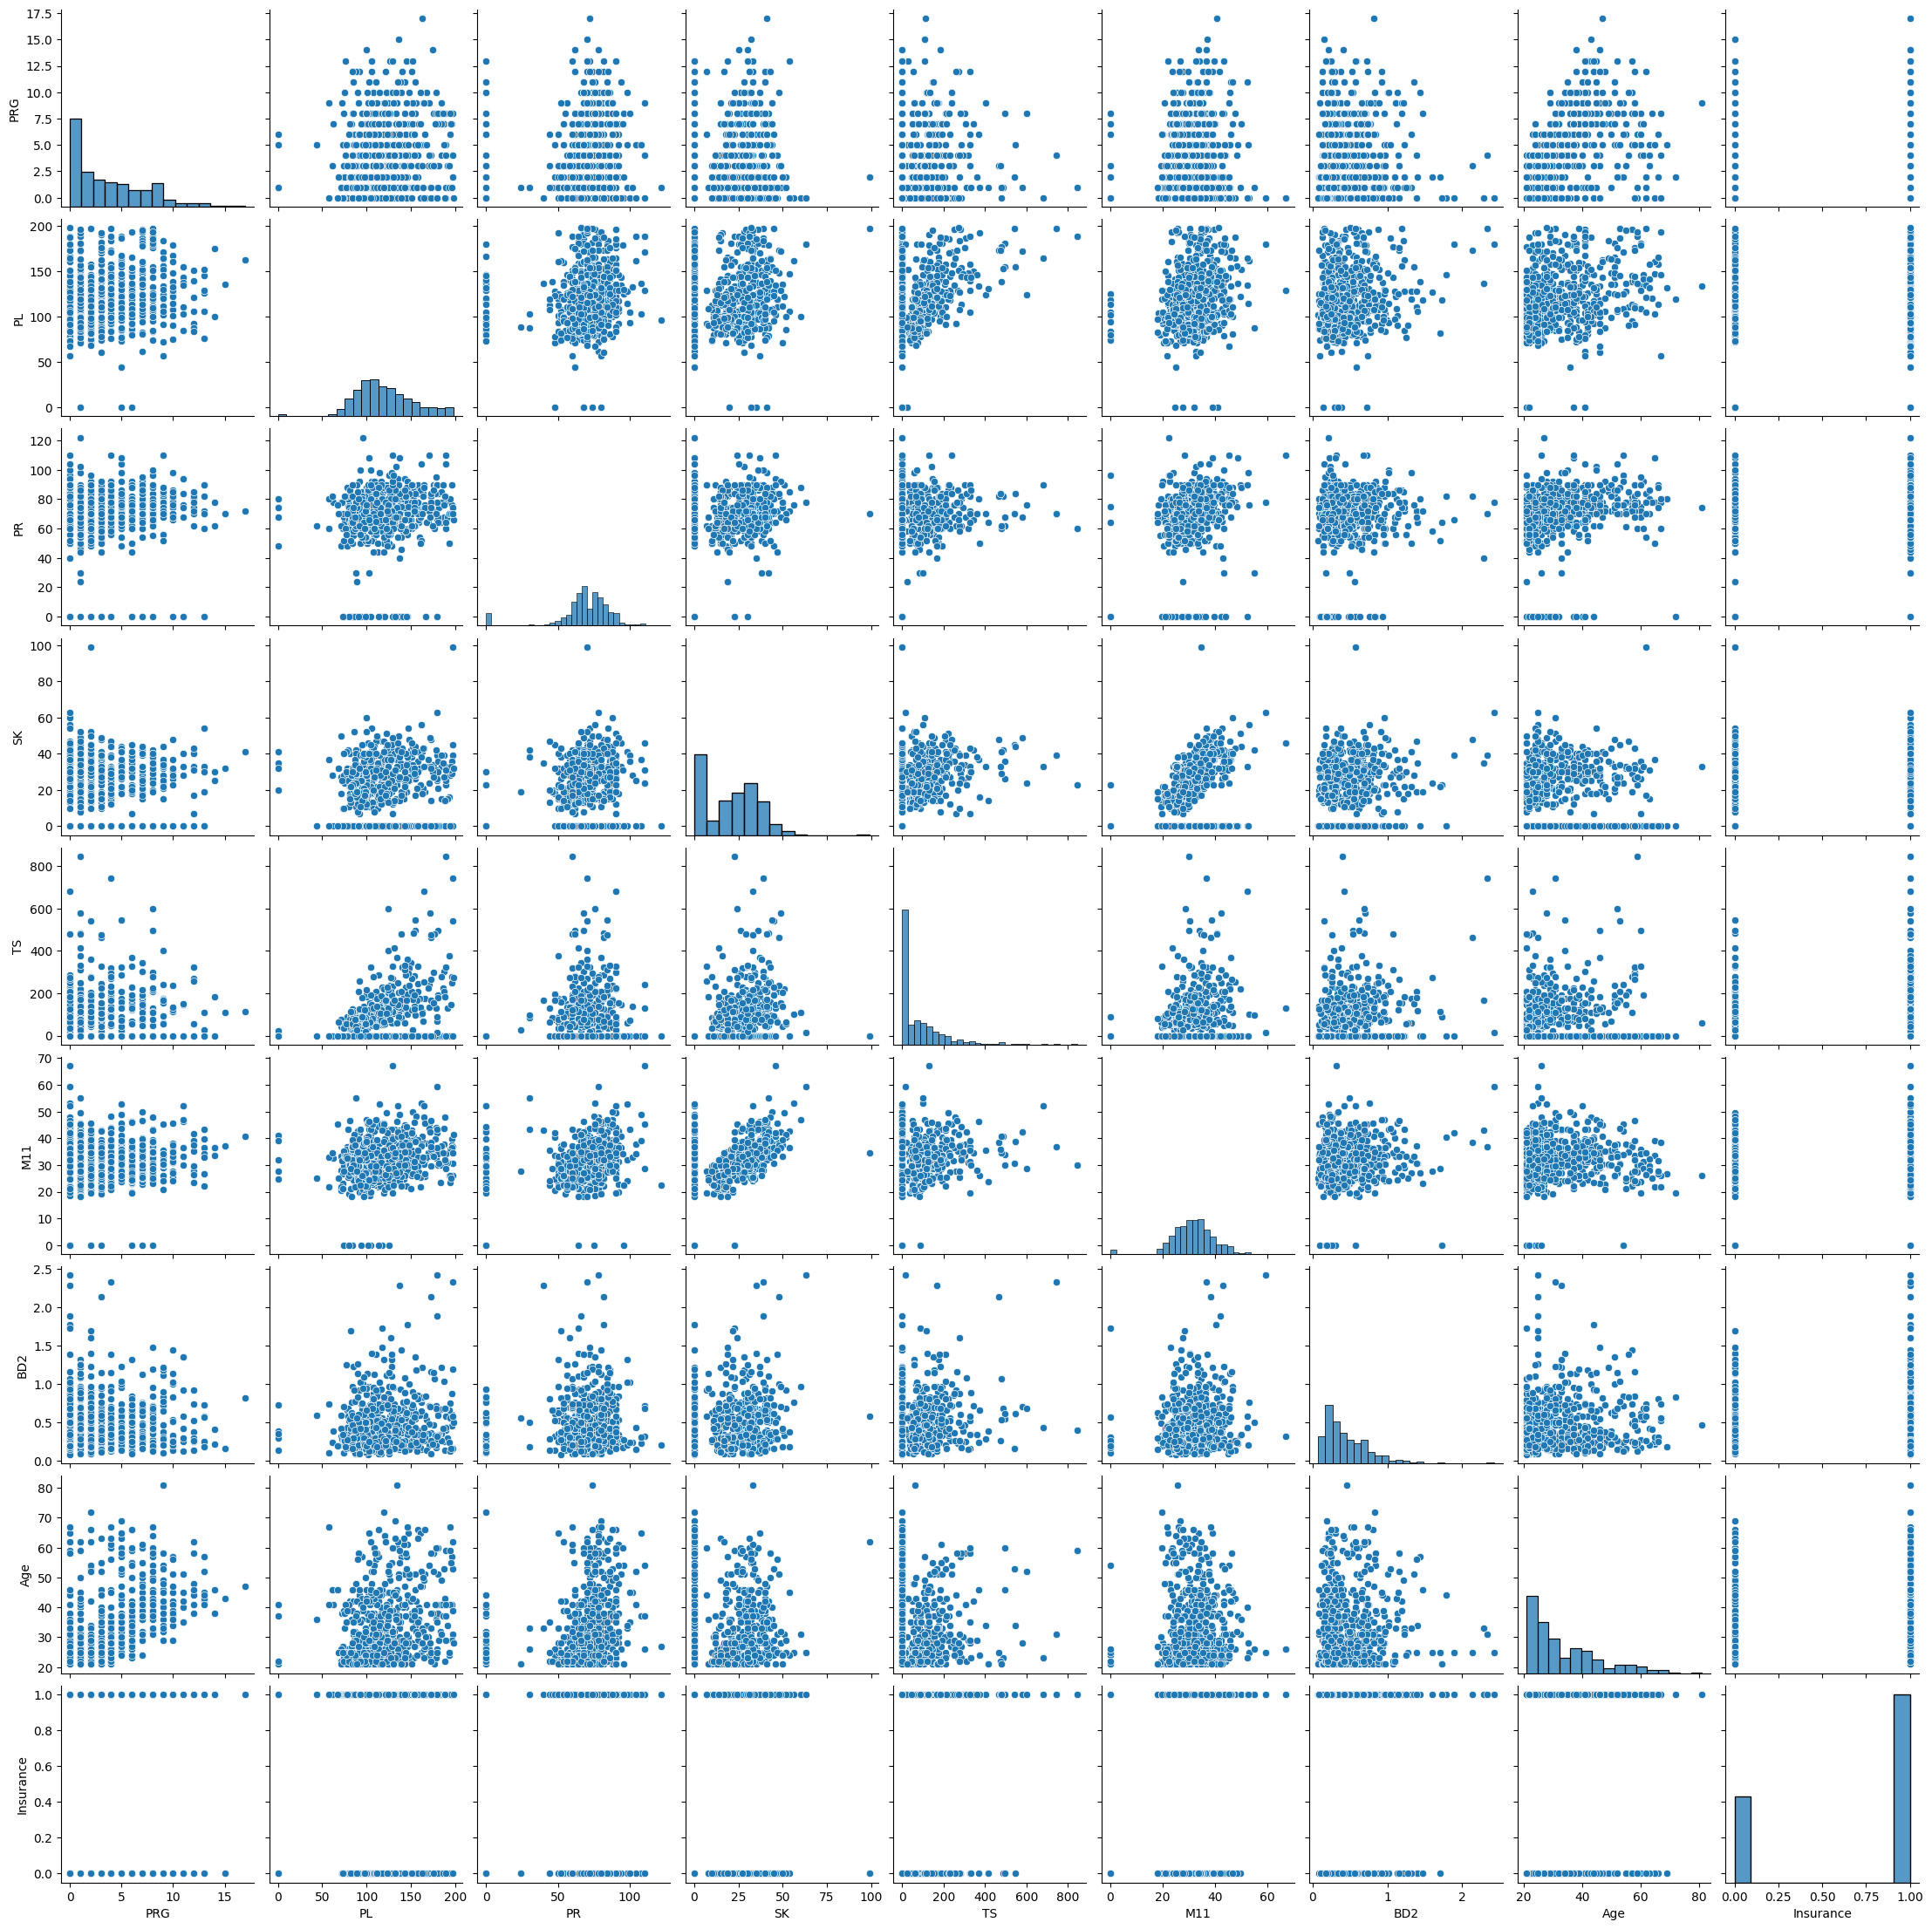

In [22]:
# Correlation matrix
numerical_columns =data.select_dtypes(include=['float64', 'int64']).columns

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Pairplot (for selected features)
sns.pairplot(data[numerical_columns])
plt.show()


**Hypothese**

Null Hypothesis (H₀): A patient’s age has no significant impact on the development of sepsis.


Alternative Hypothesis (H₁): Older patients are more likely to develop sepsis than younger patients.

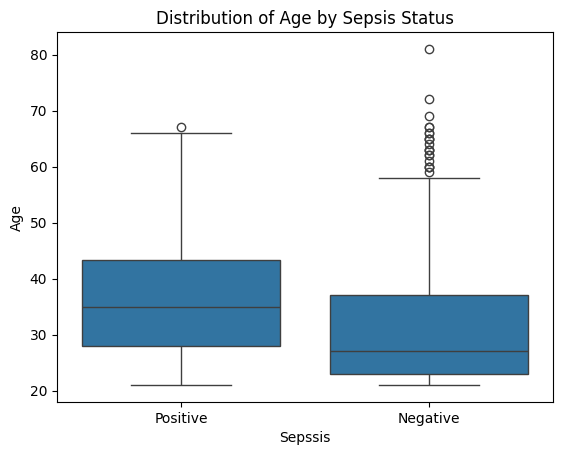

In [23]:
# Distribution of age by sepsis status

sns.boxplot(x='Sepssis', y='Age', data=data)
plt.title('Distribution of Age by Sepsis Status')
plt.show()

In [24]:
from scipy.stats import ttest_ind

# Split data into groups based on sepsis status
sepsis_positive = data[data['Sepssis'] == 'Positive']['Age']
sepsis_negative = data[data['Sepssis'] == 'Negative']['Age']

# Perform a T-test
t_stat, p_value = ttest_ind(sepsis_positive, sepsis_negative)


print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Age has a significant impact on sepsis.")
else:
    print("Fail to reject the null hypothesis: Age has no significant impact on sepsis.")


T-Statistic: 5.254202967191448
P-Value: 2.0718778891881853e-07
Reject the null hypothesis: Age has a significant impact on sepsis.


### Answering Business Questions

**Business Questions**

  
1. What patient characteristics (e.g., age, PR, SK, M11) are most predictive of developing sepsis?
2. Is there a difference in the PR, PL, and BD2 features for patients with positive vs. negative sepsis outcomes?
3. Can a machine learning model accurately predict whether a patient will develop sepsis based on their clinical features?
4. How does the combination of PR, TS, and M11 impact sepsis risk for patients of different ages.
5. What are the most effective machine learning models for identifying patients at high risk of sepsis?

What patient characteristics (e.g., age, PR, SK, M11) are most predictive of developing sepsis?

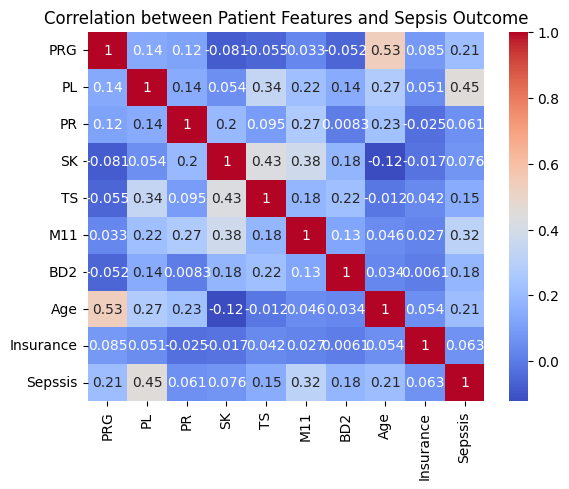

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# convert the 'Positive' and 'Negative' in the 'Sepssis' column to 1 and 0
data['Sepssis'] = data['Sepssis'].map({'Positive': 1, 'Negative': 0})

# Select all numerical columns for correlation analysis
numeric_data = data[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance', 'Sepssis']]

correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Patient Features and Sepsis Outcome")
plt.show()


Is there a difference in the PR, PL, and BD2 features for patients with positive vs. negative sepsis outcomes?

In [26]:
#print(data['Sepssis'].unique())


Difference between Positive and Negative:
PR      2.478839
PL     30.846006
BD2     0.128620
dtype: float64


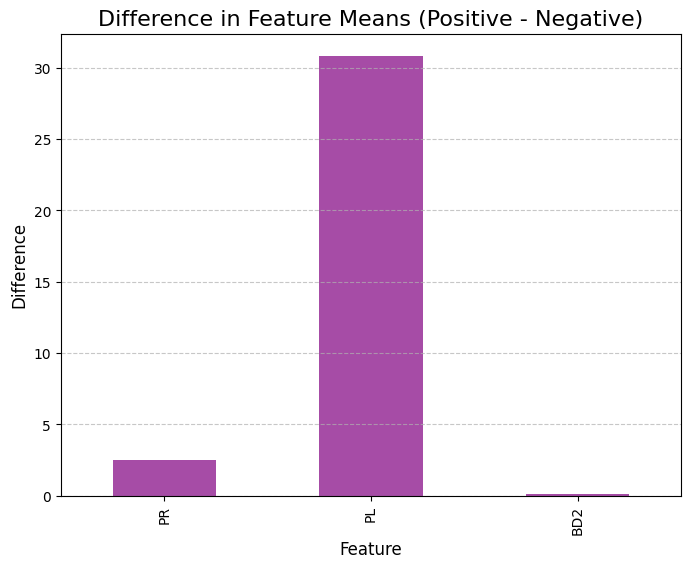

In [27]:
data['Sepssis'] = data['Sepssis'].map({1: 'Positive', 0: 'Negative'})

# group data and calculate the mean of features by sepsis outcome
sepsis_comparison = data.groupby('Sepssis')[['PR', 'PL', 'BD2']].mean()

# Calculate the difference between Positive and Negative outcomes
difference = sepsis_comparison.loc['Positive'] - sepsis_comparison.loc['Negative']
print("Difference between Positive and Negative:")
print(difference)

sepsis_comparison.reset_index(inplace=True)
sepsis_comparison_melted = sepsis_comparison.melt(
    id_vars='Sepssis', 
    value_vars=['PR', 'PL', 'BD2'], 
    var_name='Feature', 
    value_name='Mean Value'
)

#plot
plt.figure(figsize=(8, 6))
difference.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Difference in Feature Means (Positive - Negative)', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Can a machine learning model accurately predict whether a patient will develop sepsis based on their clinical features?

In [28]:
# Model to predict sepsis risk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare features and labels
X = data[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']]
y = data['Sepssis'].map({'Positive': 1, 'Negative': 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train, y_train)

# Evaluate the model
y_pred = LR_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8


How does the combination of PR, TS, and M11 impact sepsis risk for patients of different ages

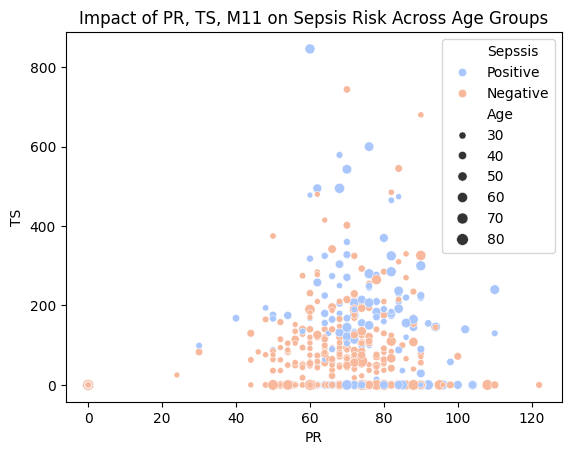

In [29]:
# Scatter plot to visualize relationship between PR, TS, M11 and Age with Sepsis risk
sns.scatterplot(data=data, x='PR', y='TS', hue='Sepssis', size='Age', palette='coolwarm')
plt.title("Impact of PR, TS, M11 on Sepsis Risk Across Age Groups")
plt.show()

What are the most effective machine learning models for identifying patients at high risk of sepsis?

In [30]:
# Compare multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = f1_score(y_test, y_pred, average='weighted')

# Get the best model based on F1-Score
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name} with F1-Score: {results[best_model_name]}")

Best Model: Logistic Regression with F1-Score: 0.7470669959864156


### Data Preparation

In [31]:
data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
594,6,123,72,45,230,33.6,0.733,34,0,Negative
595,0,188,82,14,185,32.0,0.682,22,1,Positive
596,0,67,76,0,0,45.3,0.194,46,1,Negative
597,1,89,24,19,25,27.8,0.559,21,0,Negative


In [32]:
data['Sepssis'].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

In [33]:
# separate features and target by dropping Sepssis
X = data.drop(columns = 'Sepssis', axis=1)
y = data['Sepssis']

In [34]:
#splitting the data into train and evaluation
from sklearn.model_selection import train_test_split
X_train, X_eval, y_train, y_eval = train_test_split(X,y,test_size=0.2,random_state=1)

In [35]:
#print shapes of the splits
print(f"training set shape: {X_train.shape}")
print(f"validation set shape: {X_eval.shape}")
print()

training set shape: (479, 9)
validation set shape: (120, 9)



In [36]:
#encode the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_eval_encoded = encoder.fit_transform(y_eval)

In [37]:
#print shapes of the splits
print(f"training set shape: {X_train.shape}")
print(f"validation set shape: {X_eval.shape}")
print(f"training set labels shape: {y_train_encoded.shape}")
print(f"validation set labels shape: {y_eval_encoded.shape}")
print()
print()

training set shape: (479, 9)
validation set shape: (120, 9)
training set labels shape: (479,)
validation set labels shape: (120,)




In [38]:
#number of features
input_features = X.columns
print(f"input features: {input_features}")
print()
print()

input features: Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')




In [39]:
# feature preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
categorical_features = ['Insurance']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'),),
    ('scaler', QuantileTransformer(output_distribution='normal', n_quantiles=330)),
    ('outlier_handler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler',
                                                  QuantileTransformer(n_quantiles=330,
                                                                      output_distribution='normal')),
                                                 ('outlier_handler',
                                                  RobustScaler())]),
                                 ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2',
                                  'Age']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  On

In [40]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
# Calculate VIF for each feature
# X_numeric = data[numerical_cols].dropna()  # Drop missing values temporarily for VIF
##The VIF values are used to identify features that are highly correlated with other features. If a feature has a high VIF value (typically greater than 5 or 10), it may be causing multicollinearity, which can negatively impact the model's performance.
##To address multicollinearity, you can consider removing one of the correlated features, using feature selection techniques, or using regularization methods.


vif_data = pd.DataFrame()

vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

print()
print()

Variance Inflation Factor (VIF):
     Feature        VIF
0        PRG   3.226812
1         PL  16.216312
2         PR  14.072380
3         SK   3.933874
4         TS   2.035340
5        M11  18.011167
6        BD2   3.224233
7        Age  13.294282
8  Insurance   3.072380




In [41]:
# initialize PCA with no.of components to keep

pca = PCA(n_components=9) #no of components is adjustable

In [42]:
# fit the PCA to data and transform

principal_components = pca.fit_transform(X_test)

In [43]:
#create dataframe with the components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

In [44]:
explained_variance = pca.explained_variance_ratio_

print(f"explained variance ratio: {explained_variance}")


cumulative_variance = explained_variance.cumsum()

print(f"cumulative explained variance: {cumulative_variance}")


explained variance ratio: [8.86011110e-01 6.79609870e-02 2.68875493e-02 9.54380558e-03
 6.50893701e-03 2.65414908e-03 4.13010616e-04 1.31777329e-05
 7.27406128e-06]
cumulative explained variance: [0.88601111 0.9539721  0.98085965 0.99040345 0.99691239 0.99956654
 0.99997955 0.99999273 1.        ]


## Modeling and Evaluation

In [45]:
# Initialize models
models = {
    'LR': LogisticRegression(max_iter=1000, random_state=42),
    'RF': RandomForestClassifier(random_state=42, n_estimators=100)
}

In [46]:
# model pipelines and evaluation with an imbalanced dataset

from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score
)

results_table = pd.DataFrame(columns=['name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score'])
all_pipelines = {}

# Iterate through the dictionary of models
for name, model in models.items():
    # Create a pipeline with preprocessing, PCA, and the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('pca', pca), ('model', model)])
    
    # Train the pipeline
    pipeline.fit(X_train, y_train_encoded)
    
    # Predict on evaluation set
    y_pred = pipeline.predict(X_eval)
    y_pred_prob = pipeline.predict_proba(X_eval)[:, 1]  # Predicted probabilities for ROC-AUC
    # Generate a classification report as a dictionary
    metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Extract evaluation metrics
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']  # Corrected key
    roc_auc = roc_auc_score(y_eval_encoded, y_pred_prob)
    acc = accuracy_score(y_eval_encoded, y_pred)

     # Print evaluation metrics
    print(f"Model: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print()
    
    # Add results to the DataFrame
    results_table.loc[len(results_table)] = [name, acc, precision, recall, f1, roc_auc]
    
    # Store the pipeline
    all_pipelines[name] = pipeline

# Sort the results table by F1-score
results_table = results_table.sort_values(by='f1_score', ascending=False)

# Display the results table
print("Results:")
print(results_table)


Model: LR
Accuracy: 0.725
Precision: 0.7176245210727968
Recall: 0.725
F1 Score: 0.7146362839614373
ROC-AUC: 0.7311602870813397

Model: RF
Accuracy: 0.7
Precision: 0.6897727272727273
Recall: 0.7
F1 Score: 0.6872913992297818
ROC-AUC: 0.7102272727272727

Results:
  name  accuracy_score  precision_score  recall_score  f1_score  roc_auc_score
0   LR           0.725         0.717625         0.725  0.714636       0.731160
1   RF           0.700         0.689773         0.700  0.687291       0.710227


### Modeling and Evaluation of the Balanced Dataset

In [47]:
# Balancing the dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_encoded)

In [48]:
#display the shape of the balanced dataset
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print()
print(f"X_train_balanced shape: {X_train_balanced.shape}")
print(f"y_train_balanced shape: {y_train_balanced.shape}")
print()

X_train shape: (479, 9)
y_train shape: (479,)

X_train_balanced shape: (630, 9)
y_train_balanced shape: (630,)



In [49]:
from imblearn.pipeline import Pipeline  # pipeline for imbalanced data
from imblearn.over_sampling import SMOTE

from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score
)

results_table = pd.DataFrame(columns=['name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score'])
balanced_pipelines = {}

# Iterate through the dictionary of models
for name, model in models.items():
    # Create a pipeline with preprocessing, PCA, SMOTE, and the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        #('smote', SMOTE(random_state=42)),  # Add SMOTE for oversampling
        ('model', model)
        ])
    
    # Train the pipeline
    pipeline.fit(X_train, y_train_encoded)
    
    # Predict on evaluation set
    y_pred = pipeline.predict(X_eval)
    y_pred_prob = pipeline.predict_proba(X_eval)[:, 1]  # Predicted probabilities for ROC-AUC
    
    # Generate a classification report as a dictionary
    balanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)
    
    # Extract evaluation metrics
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']
    roc_auc = roc_auc_score(y_eval_encoded, y_pred_prob)
    acc = accuracy_score(y_eval_encoded, y_pred)
    
    # Print evaluation metrics
    print(f"Model: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print()

    # Add results to the DataFrame
    results_table.loc[len(results_table)] = [name, acc, precision, recall, f1, roc_auc]
    
    # Store the pipeline
    balanced_pipelines[name] = pipeline

# Sort the results table by F1-score
results_table = results_table.sort_values(by='f1_score', ascending=False)

# Display the results table
print("Results:")
print(results_table)


Model: LR
Accuracy: 0.725
Precision: 0.6897727272727273
Recall: 0.7
F1 Score: 0.6872913992297818
ROC-AUC: 0.7311602870813397

Model: RF
Accuracy: 0.7
Precision: 0.6897727272727273
Recall: 0.7
F1 Score: 0.6872913992297818
ROC-AUC: 0.7102272727272727

Results:
  name  accuracy_score  precision_score  recall_score  f1_score  roc_auc_score
0   LR           0.725         0.689773           0.7  0.687291       0.731160
1   RF           0.700         0.689773           0.7  0.687291       0.710227


### Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


# Define the hyperparameter grids for tuning
param_grid = {
    "Logistic Regression": {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['liblinear', 'lbfgs'],
    'model__penalty': ['l1', 'l2']
},

    "Random Forest": {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}
}
# Create a stratifiedkfold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

tuned_models_df = pd.DataFrame(columns=['name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score'])

# Define a dictionary for models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}


all_pipelines = {}

for name, model in models.items():
    print(f"Hyperparameter tuning for model: {name}")
    
    # Create the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('model', model)
    ])
    
    # Perform Grid Search with relevant parameter grid
    grid_search = GridSearchCV(
        estimator = pipeline,
        param_grid=param_grid[name],  # Use model-specific grid
        scoring='f1',  # Choose the appropriate metric
        cv=skf,
        refit='f1_weighted',
        n_jobs=-1
    )

    # Fit the grid search
    grid_search.fit(X_train, y_train_encoded)
    
    # update the parametersm to the pipeline
    best_pipeline = grid_search.best_estimator_
    all_pipelines[name] = best_pipeline

    #predict on evaluation set
    y_pred = best_pipeline.predict(X_eval)

    # store the result
    tuned_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)

    # picking values from metrics dict
    precision = tuned_metrics['weighted avg']['precision']
    recall = tuned_metrics['weighted avg']['recall']
    f1 = tuned_metrics['weighted avg']['f1-score']
    roc_auc = roc_auc_score(y_eval_encoded, y_pred)
    acc = accuracy_score(y_eval_encoded, y_pred)

    # store the result
    tuned_models_df.loc[len(tuned_models_df)] = [name, acc, precision, recall, f1, roc_auc]


# Sort the results table by F1-score
tuned_models_df = tuned_models_df.sort_values(by='f1_score', ascending=False).reset_index(drop=True)

# Display the results table
print('Tuned Results:')
print(tuned_models_df)

Hyperparameter tuning for model: Logistic Regression
Hyperparameter tuning for model: Random Forest
Tuned Results:
                  name  accuracy_score  precision_score  recall_score  \
0  Logistic Regression        0.716667         0.708573      0.716667   
1        Random Forest        0.666667         0.656085      0.666667   

   f1_score  roc_auc_score  
0  0.707249       0.671053  
1  0.658333       0.622010  


In [51]:
# print features used in training 

for name, pipeline in all_pipelines.items():
    print(f"Features used in {name}:")
    print(pipeline.named_steps['preprocessor'].get_feature_names_out())

Features used in Logistic Regression:
['num__PRG' 'num__PL' 'num__PR' 'num__SK' 'num__TS' 'num__M11' 'num__BD2'
 'num__Age' 'cat__Insurance_0' 'cat__Insurance_1']
Features used in Random Forest:
['num__PRG' 'num__PL' 'num__PR' 'num__SK' 'num__TS' 'num__M11' 'num__BD2'
 'num__Age' 'cat__Insurance_0' 'cat__Insurance_1']


### Testing the best model on the test set

In [52]:
data_test =pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\API_projects\Paitients_Files_Test.csv")

In [53]:
# checking for missing values in the test set

data_test.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

In [54]:
# checking for duplicates

data_test.duplicated().sum()

0

In [55]:
# dropping the 'ID' column

data_test.drop('ID', axis=1, inplace=True)

In [56]:
data_test

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,1,109,38,18,120,23.1,0.407,26,1
1,1,108,88,19,0,27.1,0.400,24,1
2,6,96,0,0,0,23.7,0.190,28,1
3,1,124,74,36,0,27.8,0.100,30,1
4,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...
164,10,101,76,48,180,32.9,0.171,63,1
165,2,122,70,27,0,36.8,0.340,27,1
166,5,121,72,23,112,26.2,0.245,30,1
167,1,126,60,0,0,30.1,0.349,47,1


### Use model on test set

In [57]:
# Initialize a dictionary to store test predictions

test_predictions = {}

# Iterate through the dictionary of models
for name, pipeline in all_pipelines.items():

    print(f"Predicting on test set: {name}")

    # Make predictions on the test set
    y_test_pred = pipeline.predict(data_test)
    y_test_prob = pipeline.predict_proba(data_test)[:, 1]  # Predicted probabilities for ROC-AUC

    # Store the predictions
    test_predictions[name] = {
        'predictions': y_test_pred,
        'probabilities': y_test_prob
    }

    #Display predictions for each model
for name, preds in test_predictions.items():
    print(f"Predictions for {name}:")
    print(preds['predictions'])
    print(f"['probabilities for {name}:]")
    print(preds['probabilities'])


Predicting on test set: Logistic Regression
Predicting on test set: Random Forest
Predictions for Logistic Regression:
[0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0]
['probabilities for Logistic Regression:]
[0.08498461 0.0926184  0.11047331 0.11366028 0.73439984 0.83852033
 0.25132155 0.87768677 0.01813504 0.53232007 0.04669906 0.16357176
 0.76669458 0.82230791 0.25736368 0.68259602 0.09941896 0.14149336
 0.00370559 0.34503258 0.28853685 0.27995091 0.07567252 0.953293
 0.07489586 0.06474612 0.13855934 0.0344223  0.12498878 0.42333233
 0.01174632 0.32756298 0.07859758 0.16064185 0.08012631 0.06837713
 0.30397298 0.14352494 0.09694804 0.39513973 0.01408833 0.07030327
 0.46112409 0.44997059 0.244

### Saving the data

In [58]:
data_test.to_csv('testdata.csv', index=False)

In [59]:
import joblib

# save the model
joblib.dump(results_table, 'Sepsis_model.pkl')

['Sepsis_model.pkl']

In [60]:
# save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [61]:
results_table

,name,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
0,LR,0.725,0.689773,0.7,0.687291,0.731160
1,RF,0.700,0.689773,0.7,0.687291,0.710227


In [62]:
import joblib
import pandas as pd

# Save the best models (after grid search)
for name, model in all_pipelines.items():
    # Save each model to a separate file
    joblib.dump(model, f"{name}_best_model.pkl")

# Save the results DataFrame
tuned_models_df.to_csv("model_tuning_results.csv", index=False)


### Key Insights and Conclusion